In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import os
print(os.getcwd())

C:\Users\Rajnandani\OneDrive\Desktop\maven


In [4]:
os.listdir()

['.ipynb_checkpoints',
 'customers.csv',
 'customer_segments.csv',
 'Maven.ipynb',
 'Mavenprj.ipynb',
 'products.csv',
 'regions.csv',
 'returns.csv',
 'stores.csv',
 'trans1997.csv',
 'trans1998.csv',
 'transactions.csv']

In [5]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
regions = pd.read_csv("regions.csv")
returns = pd.read_csv("returns.csv")
stores = pd.read_csv("stores.csv")
trans1997 = pd.read_csv("trans1997.csv")
trans1998 = pd.read_csv("trans1998.csv")

In [6]:
# Combine transaction data
transactions = pd.concat([trans1997, trans1998], ignore_index=True)
transactions.shape


(269720, 6)

In [7]:
datasets = {
    "customers": customers,
    "products": products,
    "regions": regions,
    "returns": returns,
    "stores": stores,
    "transactions": transactions
}

# **Basic Inspection**

In [8]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA")
    display(df.head())


CUSTOMERS DATA


,customer_id,account_number,first_name,last_name,full_name,customer_address,customer_city,customer_country,marital_status,gender,total_children,member_card,age,birthdate
0,1,87462024688,Sheri,Nowmer,Sheri Nowmer,2433 Bailey Road,Tlaxiaco,Mexico,Married,Female,4,Bronze,63,1961-08-26
1,2,87470586299,Derrick,Whelply,Derrick Whelply,2219 Dewing Avenue,Sooke,Canada,Single,Male,1,Bronze,110,1915-07-03
2,3,87475757600,Jeanne,Derry,Jeanne Derry,7640 First Ave.,Issaquah,USA,Married,Female,1,Bronze,115,1910-06-21
3,4,87500482201,Michael,Spence,Michael Spence,337 Tosca Way,Burnaby,Canada,Married,Male,4,Normal,56,1969-06-20
4,5,87514054179,Maya,Gutierrez,Maya Gutierrez,8668 Via Neruda,Novato,USA,Single,Female,3,Silver,74,1951-05-10



PRODUCTS DATA


,product_id,product_brand,product_name,product_code,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1,Washington,Berry Juice,90748583674,236.55,78.02,8.39,No,No
1,2,Washington,Mango Drink,96516502499,61.42,21.58,7.42,No,Yes
2,3,Washington,Strawberry Drink,58427771925,68.89,33.20,13.10,Yes,Yes
3,4,Washington,Cream Soda,64412155747,302.12,136.12,10.60,Yes,No
4,5,Washington,Diet Soda,85561191439,181.77,63.91,6.66,Yes,No



REGIONS DATA


,region_id,sales_district,sales_region
0,1,San Francisco,Central West
1,2,Mexico City,Mexico Central
2,3,Los Angeles,South West
3,4,Guadalajara,Mexico West
4,5,Vancouver,Canada West



RETURNS DATA


,return_date,product_id,store_id,quantity
0,1/1/1997,250,6,1
1,1/1/1997,628,6,1
2,1/1/1997,869,6,1
3,1/2/1997,469,11,1
4,1/2/1997,532,23,2



STORES DATA


,store_id,region_id,store_type,store_city,store_country,first_opened_date
0,1,28,Supermarket,Acapulco,Mexico,1/9/1982
1,2,78,Small Grocery,Bellingham,USA,4/2/1970
2,3,76,Supermarket,Bremerton,USA,6/14/1959
3,4,27,Gourmet Supermarket,Camacho,Mexico,9/27/1994
4,5,4,Small Grocery,Guadalajara,Mexico,9/18/1978



TRANSACTIONS DATA


,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1/1/1997,12/31/1996,869,3449,6,5
1,1/1/1997,12/31/1996,1472,3449,6,3
2,1/1/1997,12/28/1996,76,3449,6,4
3,1/1/1997,12/26/1996,320,3449,6,3
4,1/1/1997,12/25/1996,4,3449,6,4


In [9]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA")
    display(df.tail())


CUSTOMERS DATA


,customer_id,account_number,first_name,last_name,full_name,customer_address,customer_city,customer_country,marital_status,gender,total_children,member_card,age,birthdate
10276,10277,87439274191,Fran,Ross,Fran Ross,5603 Blackridge Drive,Lake Oswego,USA,Married,Male,4,Bronze,51,1974-02-09
10277,10278,87448420500,Myreda,Calahoo,Myreda Calahoo,263 La Orinda Pl.,N. Vancouver,Canada,Married,Female,0,Bronze,98,1926-12-08
10278,10279,87453135848,Mary,Ayers,Mary Ayers,6885 Auburn,Lincoln Acres,USA,Single,Male,3,Bronze,112,1913-05-18
10279,10280,87458639740,Ernest,Aiello,Ernest Aiello,5077 Bannock Ct.,Puyallup,USA,Married,Female,5,Golden,56,1968-09-06
10280,10281,87460163235,Samuel,Cartney,Samuel Cartney,4609 Parkway Drive,Vancouver,Canada,Single,Female,5,Bronze,111,1914-07-06



PRODUCTS DATA


,product_id,product_brand,product_name,product_code,product_retail_price,product_cost,product_weight,recyclable,low_fat
1555,1556,CDR,Creamy Peanut Butter,29538288712,219.95,94.62,6.94,Yes,Yes
1556,1557,CDR,Strawberry Preserves,50687324404,99.60,39.84,15.40,Yes,No
1557,1558,CDR,Extra Chunky Peanut Butter,84930775761,179.28,68.06,11.50,No,Yes
1558,1559,CDR,Apple Preserves,75317577719,134.46,51.46,21.00,No,No
1559,1560,CDR,Grape Jelly,54896665215,132.80,61.42,12.50,No,Yes



REGIONS DATA


,region_id,sales_district,sales_region
104,105,Victoria,Canada West
105,106,Mexico City,Mexico Central
106,107,Mexico City,Mexico Central
107,108,Mexico City,Mexico Central
108,109,Mexico City,Mexico Central



RETURNS DATA


,return_date,product_id,store_id,quantity
7077,12/30/1998,1037,11,2
7078,12/30/1998,1048,10,1
7079,12/30/1998,1065,10,1
7080,12/30/1998,1154,11,1
7081,12/30/1998,1291,11,1



STORES DATA


,store_id,region_id,store_type,store_city,store_country,first_opened_date
19,20,6,Mid-Size Grocery,Victoria,Canada,2/6/1980
20,21,106,Deluxe Supermarket,San Andres,Mexico,2/7/1986
21,22,88,Small Grocery,Walla Walla,USA,1/24/1951
22,23,89,Mid-Size Grocery,Yakima,USA,7/16/1977
23,24,7,Supermarket,San Diego,USA,5/22/1979



TRANSACTIONS DATA


,transaction_date,stock_date,product_id,customer_id,store_id,quantity
269715,12/30/1998,12/29/1998,1521,7197,11,3
269716,12/30/1998,12/23/1998,1536,5223,10,2
269717,12/30/1998,12/23/1998,1542,8077,10,4
269718,12/30/1998,12/28/1998,1544,4485,10,2
269719,12/30/1998,12/29/1998,1549,5223,10,3


In [10]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA")
    display(df.info())


CUSTOMERS DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10281 entries, 0 to 10280
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10281 non-null  int64 
 1   account_number    10281 non-null  int64 
 2   first_name        10281 non-null  object
 3   last_name         10281 non-null  object
 4   full_name         10281 non-null  object
 5   customer_address  10281 non-null  object
 6   customer_city     10281 non-null  object
 7   customer_country  10281 non-null  object
 8   marital_status    10281 non-null  object
 9   gender            10281 non-null  object
 10  total_children    10281 non-null  int64 
 11  member_card       10281 non-null  object
 12  age               10281 non-null  int64 
 13  birthdate         10281 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


None


PRODUCTS DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1560 non-null   int64  
 1   product_brand         1560 non-null   object 
 2   product_name          1560 non-null   object 
 3   product_code          1560 non-null   int64  
 4   product_retail_price  1560 non-null   float64
 5   product_cost          1560 non-null   float64
 6   product_weight        1560 non-null   float64
 7   recyclable            1560 non-null   object 
 8   low_fat               1560 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 109.8+ KB


None


REGIONS DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region_id       109 non-null    int64 
 1   sales_district  109 non-null    object
 2   sales_region    109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


None


RETURNS DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7082 entries, 0 to 7081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   return_date  7082 non-null   object
 1   product_id   7082 non-null   int64 
 2   store_id     7082 non-null   int64 
 3   quantity     7082 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 221.4+ KB


None


STORES DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   store_id           24 non-null     int64 
 1   region_id          24 non-null     int64 
 2   store_type         24 non-null     object
 3   store_city         24 non-null     object
 4   store_country      24 non-null     object
 5   first_opened_date  24 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


None


TRANSACTIONS DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269720 entries, 0 to 269719
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  269720 non-null  object
 1   stock_date        269720 non-null  object
 2   product_id        269720 non-null  int64 
 3   customer_id       269720 non-null  int64 
 4   store_id          269720 non-null  int64 
 5   quantity          269720 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 12.3+ MB


None

In [11]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA")
    display(df.describe())


CUSTOMERS DATA


,customer_id,account_number,total_children,age
count,10281.000000,1.028100e+04,10281.000000,10281.000000
mean,5141.000000,5.032243e+10,2.502675,79.578835
std,2968.013393,2.534394e+10,1.500395,20.126933
min,1.000000,1.001355e+10,0.000000,44.000000
25%,2571.000000,2.836150e+10,1.000000,62.000000
50%,5141.000000,4.848514e+10,3.000000,80.000000
75%,7711.000000,7.087943e+10,4.000000,97.000000
max,10281.000000,9.996103e+10,5.000000,115.000000



PRODUCTS DATA


,product_id,product_code,product_retail_price,product_cost,product_weight
count,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000
mean,780.500000,5.562930e+10,175.734410,70.879340,13.804821
std,450.477524,2.580380e+10,77.420684,33.565205,4.631014
min,1.000000,1.003103e+10,41.500000,13.280000,6.000000
25%,390.750000,3.345056e+10,117.652500,44.820000,9.657500
50%,780.500000,5.629308e+10,176.790000,68.060000,13.600000
75%,1170.250000,7.798317e+10,231.777500,93.790000,17.725000
max,1560.000000,9.998368e+10,330.340000,163.510000,21.900000



REGIONS DATA


,region_id
count,109.000000
mean,55.000000
std,31.609598
min,1.000000
25%,28.000000
50%,55.000000
75%,82.000000
max,109.000000



RETURNS DATA


,product_id,store_id,quantity
count,7082.000000,7082.000000,7082.000000
mean,784.086840,12.908924,1.169726
std,447.652958,6.259671,0.375418
min,1.000000,1.000000,1.000000
25%,398.000000,8.000000,1.000000
50%,789.500000,13.000000,1.000000
75%,1172.000000,17.000000,1.000000
max,1559.000000,24.000000,2.000000



STORES DATA


,store_id,region_id
count,24.000000,24.000000
mean,12.500000,37.541667
std,7.071068,34.428223
min,1.000000,1.000000
25%,6.750000,6.750000
50%,12.500000,25.000000
75%,18.250000,76.500000
max,24.000000,106.000000



TRANSACTIONS DATA


,product_id,customer_id,store_id,quantity
count,269720.000000,269720.000000,269720.000000,269720.000000
mean,783.862873,5119.390405,12.753730,3.090201
std,447.926131,2901.883077,6.349746,0.835554
min,1.000000,3.000000,1.000000,1.000000
25%,396.000000,2570.000000,7.000000,3.000000
50%,787.000000,5090.000000,13.000000,3.000000
75%,1174.000000,7614.000000,17.000000,4.000000
max,1559.000000,10281.000000,24.000000,6.000000


In [12]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA")
    display(df.columns)


CUSTOMERS DATA


Index(['customer_id', 'account_number', 'first_name', 'last_name', 'full_name',
       'customer_address', 'customer_city', 'customer_country',
       'marital_status', 'gender', 'total_children', 'member_card', 'age',
       'birthdate'],
      dtype='object')


PRODUCTS DATA


Index(['product_id', 'product_brand', 'product_name', 'product_code',
       'product_retail_price', 'product_cost', 'product_weight', 'recyclable',
       'low_fat'],
      dtype='object')


REGIONS DATA


Index(['region_id', 'sales_district', 'sales_region'], dtype='object')


RETURNS DATA


Index(['return_date', 'product_id', 'store_id', 'quantity'], dtype='object')


STORES DATA


Index(['store_id', 'region_id', 'store_type', 'store_city', 'store_country',
       'first_opened_date'],
      dtype='object')


TRANSACTIONS DATA


Index(['transaction_date', 'stock_date', 'product_id', 'customer_id',
       'store_id', 'quantity'],
      dtype='object')

In [13]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA")
    display(df.shape)


CUSTOMERS DATA


(10281, 14)


PRODUCTS DATA


(1560, 9)


REGIONS DATA


(109, 3)


RETURNS DATA


(7082, 4)


STORES DATA


(24, 6)


TRANSACTIONS DATA


(269720, 6)

# **Data Cleaning**

### **Duplicates** 

In [14]:
for name, df in datasets.items():
    print(f"{name}: {df.duplicated().sum()} duplicate rows")


customers: 0 duplicate rows
products: 0 duplicate rows
regions: 0 duplicate rows
returns: 0 duplicate rows
stores: 0 duplicate rows
transactions: 9 duplicate rows


In [15]:
# Drop duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
regions.drop_duplicates(inplace=True)
returns.drop_duplicates(inplace=True)
stores.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


### **Missing Values**

In [16]:
for name, df in datasets.items():
    print(f"\n{name.upper()} NULL CHECK:\n")
    print(df.isnull().sum())



CUSTOMERS NULL CHECK:

customer_id         0
account_number      0
first_name          0
last_name           0
full_name           0
customer_address    0
customer_city       0
customer_country    0
marital_status      0
gender              0
total_children      0
member_card         0
age                 0
birthdate           0
dtype: int64

PRODUCTS NULL CHECK:

product_id              0
product_brand           0
product_name            0
product_code            0
product_retail_price    0
product_cost            0
product_weight          0
recyclable              0
low_fat                 0
dtype: int64

REGIONS NULL CHECK:

region_id         0
sales_district    0
sales_region      0
dtype: int64

RETURNS NULL CHECK:

return_date    0
product_id     0
store_id       0
quantity       0
dtype: int64

STORES NULL CHECK:

store_id             0
region_id            0
store_type           0
store_city           0
store_country        0
first_opened_date    0
dtype: int64

TRANSACTIONS N

In [17]:
customers['last_name'].fillna('kohak', inplace=True)

In [18]:
customers['last_name'].isnull().sum()  # Should be 0 now


0

### **Datatypes**

In [19]:
transactions.dtypes

transaction_date    object
stock_date          object
product_id           int64
customer_id          int64
store_id             int64
quantity             int64
dtype: object

In [20]:
#Value Counts for Categorical Columns

In [21]:
# Merge transactions with customers
merged = transactions.merge(customers, on='customer_id', how='left')

# Merge with products
merged = merged.merge(products, on='product_id', how='left')

# Merge with stores
merged = merged.merge(stores, on='store_id', how='left')

# Merge with regions
merged = merged.merge(regions, on='region_id', how='left')

merged.head()


,transaction_date,stock_date,product_id,customer_id,store_id,quantity,account_number,first_name,last_name,full_name,...,product_weight,recyclable,low_fat,region_id,store_type,store_city,store_country,first_opened_date,sales_district,sales_region
0,1/1/1997,12/31/1996,869,3449,6,5,27508307099,Lana,Weis,Lana Weis,...,17.00,Yes,No,47,Gourmet Supermarket,Beverly Hills,USA,1/3/1981,Los Angeles,South West
1,1/1/1997,12/31/1996,1472,3449,6,3,27508307099,Lana,Weis,Lana Weis,...,8.28,Yes,No,47,Gourmet Supermarket,Beverly Hills,USA,1/3/1981,Los Angeles,South West
2,1/1/1997,12/28/1996,76,3449,6,4,27508307099,Lana,Weis,Lana Weis,...,18.10,No,Yes,47,Gourmet Supermarket,Beverly Hills,USA,1/3/1981,Los Angeles,South West
3,1/1/1997,12/26/1996,320,3449,6,3,27508307099,Lana,Weis,Lana Weis,...,16.40,No,No,47,Gourmet Supermarket,Beverly Hills,USA,1/3/1981,Los Angeles,South West
4,1/1/1997,12/25/1996,4,3449,6,4,27508307099,Lana,Weis,Lana Weis,...,10.60,Yes,No,47,Gourmet Supermarket,Beverly Hills,USA,1/3/1981,Los Angeles,South West


# **Feature Engineering**

In [22]:
# Define conversion rate
usd_to_inr = 83

# Convert prices from USD to INR directly in the 'products' DataFrame
products['product_retail_price'] = products['product_retail_price'] * usd_to_inr
products['product_cost'] = products['product_cost'] * usd_to_inr

# Preview the updated table
products[['product_id', 'product_retail_price', 'product_cost']].head()


,product_id,product_retail_price,product_cost
0,1,19633.65,6475.66
1,2,5097.86,1791.14
2,3,5717.87,2755.60
3,4,25075.96,11297.96
4,5,15086.91,5304.53


In [23]:
products.head()

,product_id,product_brand,product_name,product_code,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1,Washington,Berry Juice,90748583674,19633.65,6475.66,8.39,No,No
1,2,Washington,Mango Drink,96516502499,5097.86,1791.14,7.42,No,Yes
2,3,Washington,Strawberry Drink,58427771925,5717.87,2755.60,13.10,Yes,Yes
3,4,Washington,Cream Soda,64412155747,25075.96,11297.96,10.60,Yes,No
4,5,Washington,Diet Soda,85561191439,15086.91,5304.53,6.66,Yes,No


In [24]:
# Add calculated columns
merged['revenue'] = merged['product_retail_price'] * merged['quantity']
merged['cost'] = merged['product_cost'] * merged['quantity']
merged['profit'] = merged['revenue'] - merged['cost']

# Convert dates
merged['transaction_date'] = pd.to_datetime(merged['transaction_date'])
merged['year'] = merged['transaction_date'].dt.year
merged['month'] = merged['transaction_date'].dt.month


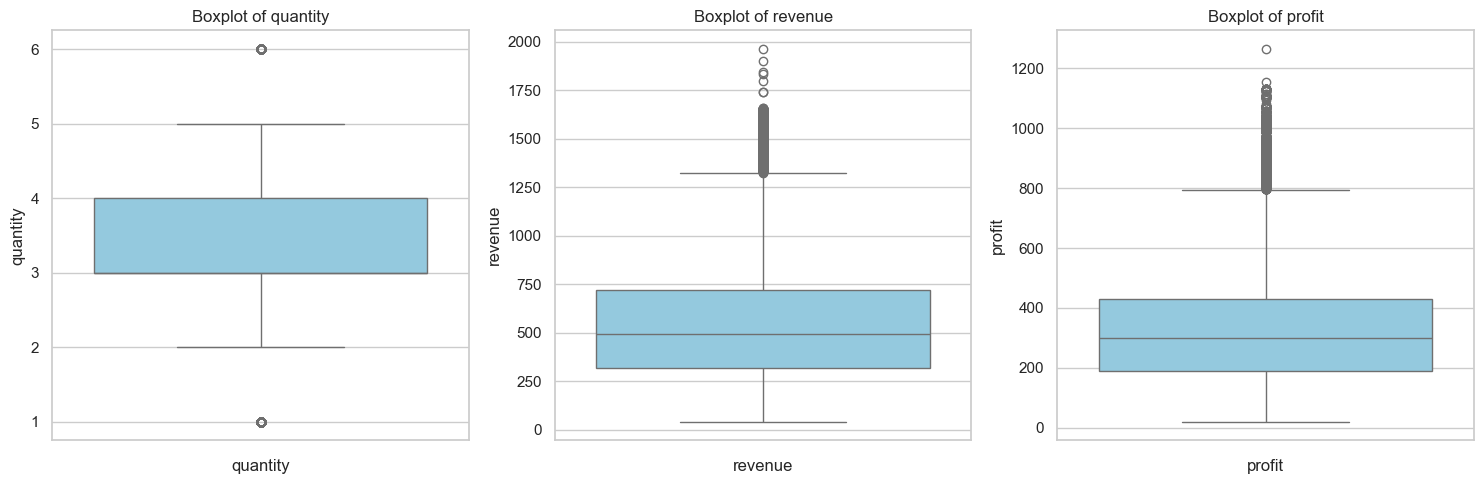

In [25]:
# Boxplots to visually detect outliers
numerical_cols = ['quantity', 'revenue', 'profit']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=merged[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()



In [26]:
merged.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
transaction_date,269711,NaN,NaN,NaN,1998-03-10 00:03:11.565045632,1997-01-01 00:00:00,1997-10-18 00:00:00,1998-04-09 00:00:00,1998-08-25 00:00:00,1998-12-30 00:00:00,NaN
stock_date,269711,735,12/6/1998,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,269711.0,NaN,NaN,NaN,783.860406,1.0,396.0,787.0,1174.0,1559.0,447.926969
customer_id,269711.0,NaN,NaN,NaN,5119.367223,3.0,2570.0,5090.0,7614.0,10281.0,2901.87381
store_id,269711.0,NaN,NaN,NaN,12.753762,1.0,7.0,13.0,17.0,24.0,6.349775
quantity,269711.0,NaN,NaN,NaN,3.090197,1.0,3.0,3.0,4.0,6.0,0.835555
account_number,269711.0,NaN,NaN,NaN,48903377260.630112,10013550500.0,27820789813.0,46229149699.0,68543835878.0,99961032867.0,24971064139.987587
first_name,269711,2101,John,4791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,269711,4983,Smith,2873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_name,269711,8762,Dawn Laner,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Univariate Analysis**

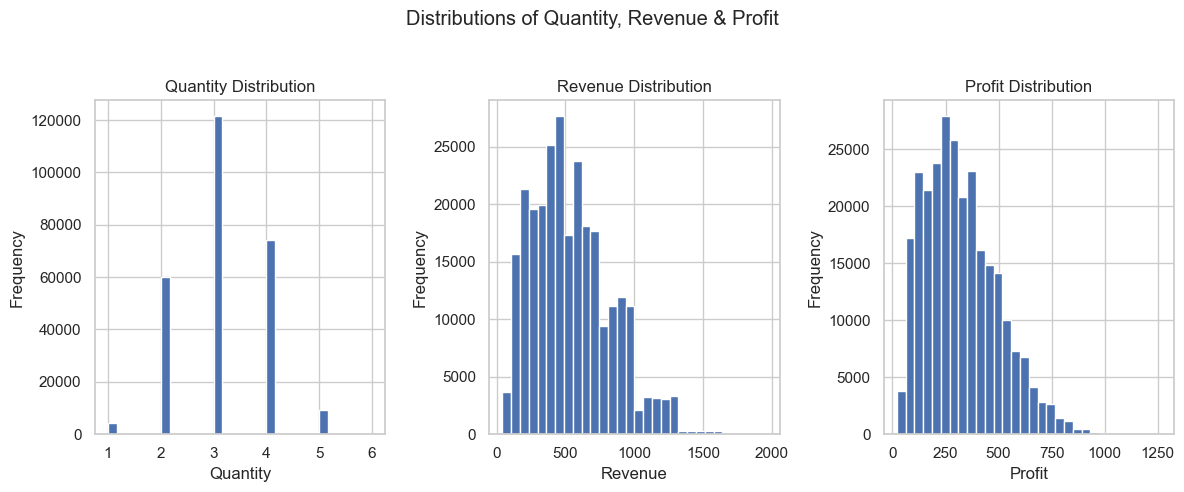

In [27]:
# Numerical distributions with labeled axes
numerical_cols = ['quantity', 'revenue', 'profit']
merged[numerical_cols].hist(bins=30, figsize=(12, 5), layout=(1, 3))

# Label each subplot
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'{col.capitalize()} Distribution')

plt.suptitle('Distributions of Quantity, Revenue & Profit')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


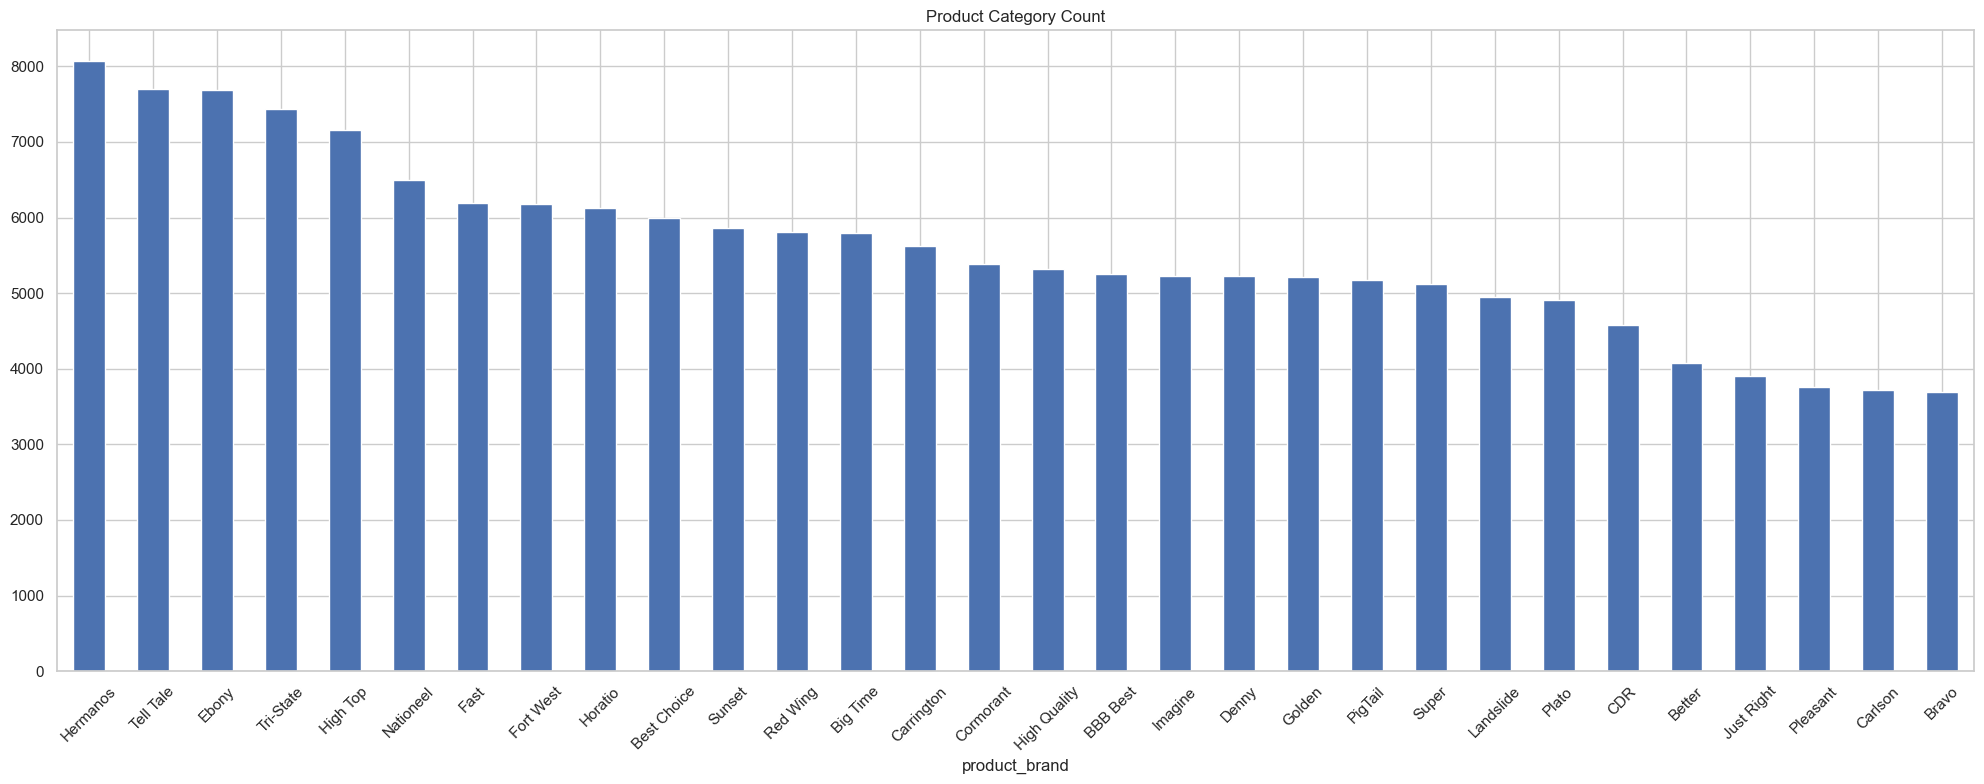

In [28]:
# Categorical - Product Category
plt.figure(figsize=(20,8))
merged['product_brand'].value_counts().head(30).plot(kind='bar')
plt.title('Product Category Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Bivariate Analysis**

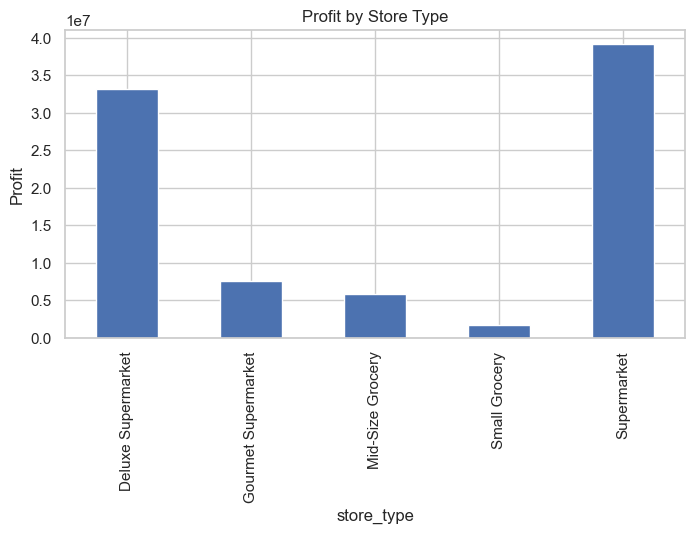

In [29]:
# Profit by store type
merged.groupby('store_type')['profit'].sum().plot(kind='bar', title='Profit by Store Type', figsize=(8,4))
plt.ylabel('Profit')
plt.show()


# **Correlation**

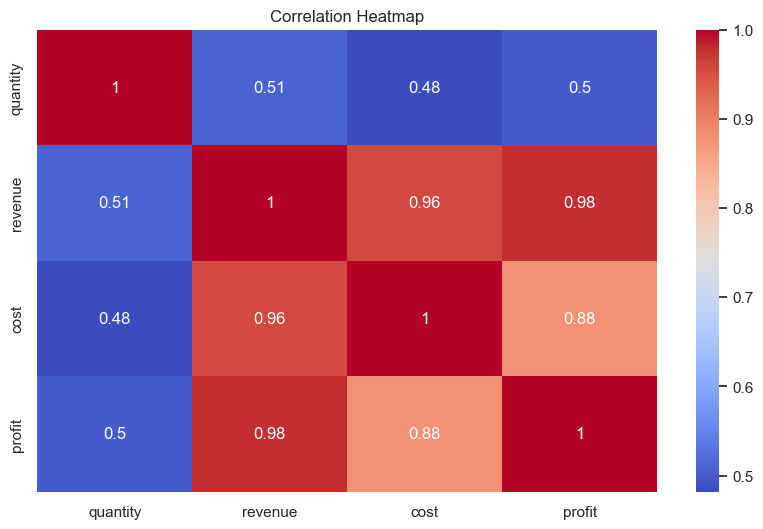

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(merged[['quantity', 'revenue', 'cost', 'profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Distribution**

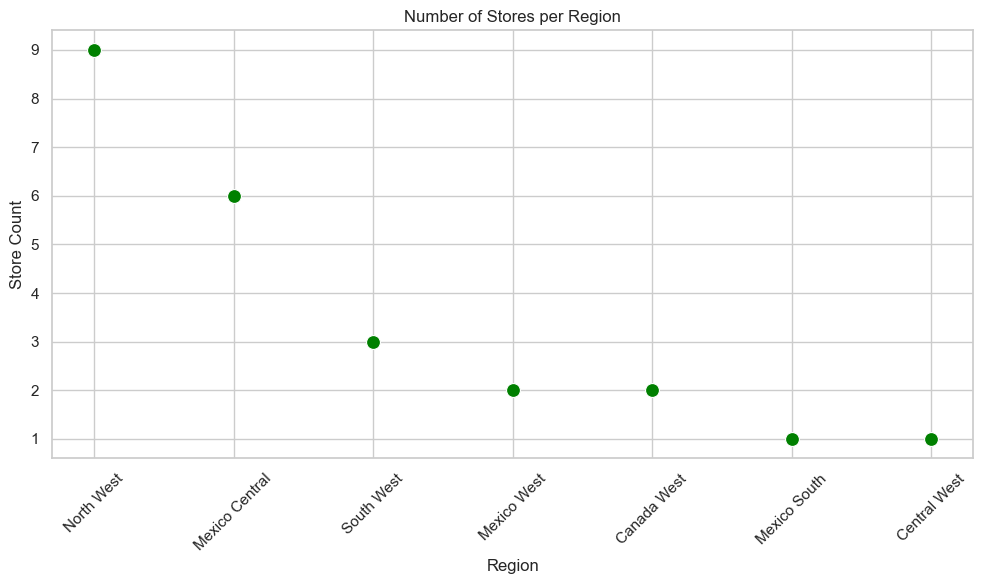

In [31]:
# Merge stores with regions
stores_regions = stores.merge(regions, on='region_id', how='left')

# Count number of stores per region
store_counts = stores_regions['sales_region'].value_counts().reset_index()
store_counts.columns = ['sales_region', 'store_count']

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_counts, x='sales_region', y='store_count', s=100, color='green')
plt.title('Number of Stores per Region')
plt.xlabel('Region')
plt.ylabel('Store Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Remove brand name prefix from product_name
def remove_brand_prefix(row):
    brand = str(row['product_brand']).strip()
    name = str(row['product_name']).strip()
    
    if name.lower().startswith(brand.lower()):
        return name[len(brand):].strip()
    return name

# Apply the function
products['product_name'] = products.apply(remove_brand_prefix, axis=1)

# Check result
products[['product_brand', 'product_name']].head()


,product_brand,product_name
0,Washington,Berry Juice
1,Washington,Mango Drink
2,Washington,Strawberry Drink
3,Washington,Cream Soda
4,Washington,Diet Soda


In [33]:
products.head()

,product_id,product_brand,product_name,product_code,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1,Washington,Berry Juice,90748583674,19633.65,6475.66,8.39,No,No
1,2,Washington,Mango Drink,96516502499,5097.86,1791.14,7.42,No,Yes
2,3,Washington,Strawberry Drink,58427771925,5717.87,2755.60,13.10,Yes,Yes
3,4,Washington,Cream Soda,64412155747,25075.96,11297.96,10.60,Yes,No
4,5,Washington,Diet Soda,85561191439,15086.91,5304.53,6.66,Yes,No


In [34]:
# Merge transactions with products to get price info
transactions_merged = transactions.merge(products[['product_id', 'product_retail_price']], on='product_id', how='left')

# Calculate spend per transaction
transactions_merged['spend'] = transactions_merged['quantity'] * transactions_merged['product_retail_price']

# Group by customer to get summary
customer_summary = transactions_merged.groupby('customer_id').agg(
    total_orders=('product_id', 'count'),
    total_quantity=('quantity', 'sum'),
    total_spend=('spend', 'sum')
).reset_index()

# Merge with customer demographics
customer_features = customer_summary.merge(
    customers[['customer_id', 'age', 'gender', 'marital_status', 'member_card']],
    on='customer_id',
    how='left'
)

In [35]:
# Merge returns with transactions to get customer_id
returns_with_customer = pd.merge(returns, transactions, on=["product_id", "store_id"], how="left")

# Remove duplicates and keep relevant columns
returns_with_customer = returns_with_customer[["customer_id", "quantity_x"]]
returns_with_customer.columns = ["customer_id", "total_returned"]

# Sum total returned quantity per customer
returns_summary = returns_with_customer.groupby("customer_id")["total_returned"].sum().reset_index()

In [38]:
purchase_summary = transactions.groupby("customer_id")["quantity"].sum().reset_index()
purchase_summary.columns = ["customer_id", "total_purchased"]

In [39]:
# Combine both summaries
customer_features = pd.merge(purchase_summary, returns_summary, on="customer_id", how="left")

# Fill missing returns with 0
customer_features["total_returned"] = customer_features["total_returned"].fillna(0)

# Add return rate
customer_features["return_rate"] = customer_features["total_returned"] / customer_features["total_purchased"]


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = customer_features[["total_purchased", "total_returned", "return_rate"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["cluster"] = kmeans.fit_predict(scaled_features)

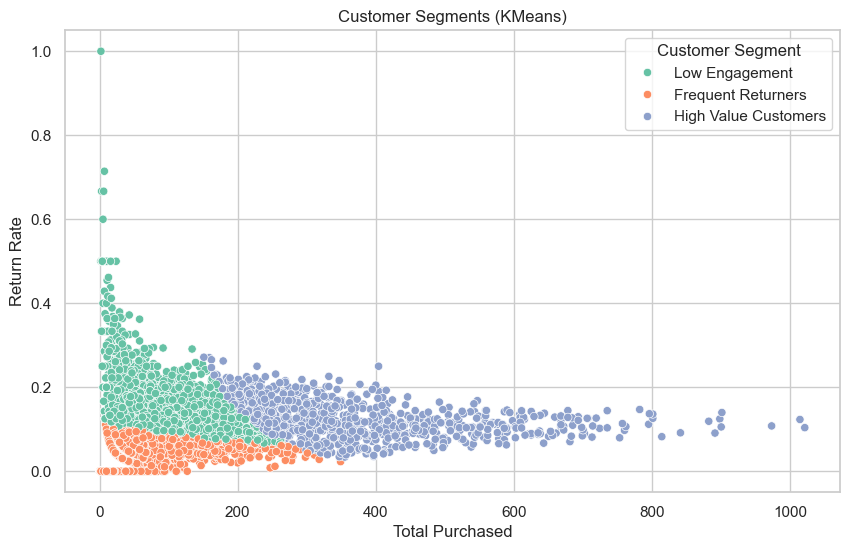

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create mapping from cluster number to descriptive name
cluster_labels = {
    0: 'High Value Customers',
    1: 'Frequent Returners',
    2: 'Low Engagement',

}

# Step 2: Create a new column with labels
customer_features['cluster_label'] = customer_features['cluster'].map(cluster_labels)

# Step 3: Plot using the new label column
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_features,
    x="total_purchased",
    y="return_rate",
    hue="cluster_label",
    palette="Set2"
)

plt.title("Customer Segments (KMeans)")
plt.xlabel("Total Purchased")
plt.ylabel("Return Rate")
plt.legend(title="Customer Segment")
plt.grid(True)
plt.show()


In [42]:
# Export customer segmentation result
customer_features.to_csv("customer_segments.csv", index=False)

In [37]:
customers.to_csv("customers.csv", index=False)
products.to_csv("products.csv", index=False)
regions.to_csv("regions.csv", index=False)
returns.to_csv("returns.csv", index=False)
stores.to_csv("stores.csv", index=False)
trans1997.to_csv("trans1997.csv", index=False)
trans1998.to_csv("trans1998.csv", index=False)
transactions.to_csv("transactions.csv", index=False)